In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
from dataloader import read_bci_data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
# Load data
train_data, train_label, test_data, test_label = read_bci_data()

# Convert data type into float32
train_data  = torch.from_numpy(train_data).type(torch.float32)
train_label = torch.from_numpy(train_label).type(torch.long)
test_data   = torch.from_numpy(test_data).type(torch.float32)
test_label  = torch.from_numpy(test_label).type(torch.long)

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


## Implement EEGNet

In [4]:
from EEGNet import EEGNet

# Run Model

In [5]:
from run_model import run, draw_figure
line_list = []
label_list = ['elu_train','elu_test','leaky_relu_train','leaky_relu_test','relu_train','relu_test']

# ELU
net = EEGNet().to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               , num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)

# Leaky_relu
net = EEGNet(act_f='leakyrelu').to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               , num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)

# Relu
net = EEGNet(act_f='relu').to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               ,num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)

# Draw loss & accuracy figures

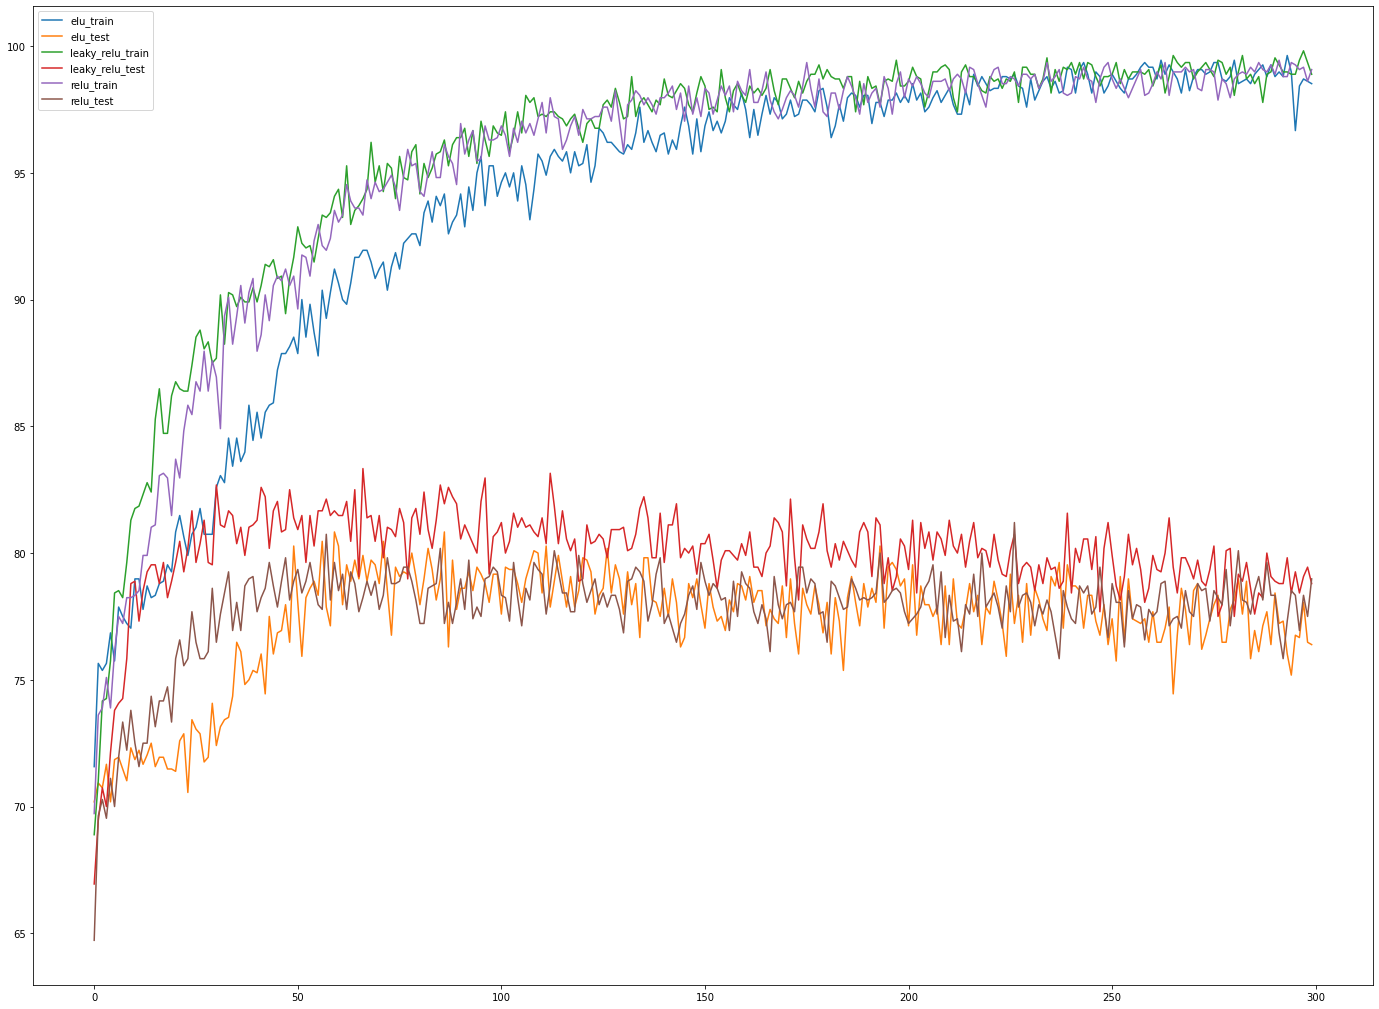

In [9]:
plt.figure(figsize=[24,18])
draw_figure(plt,line_list,label_list, loc='best')

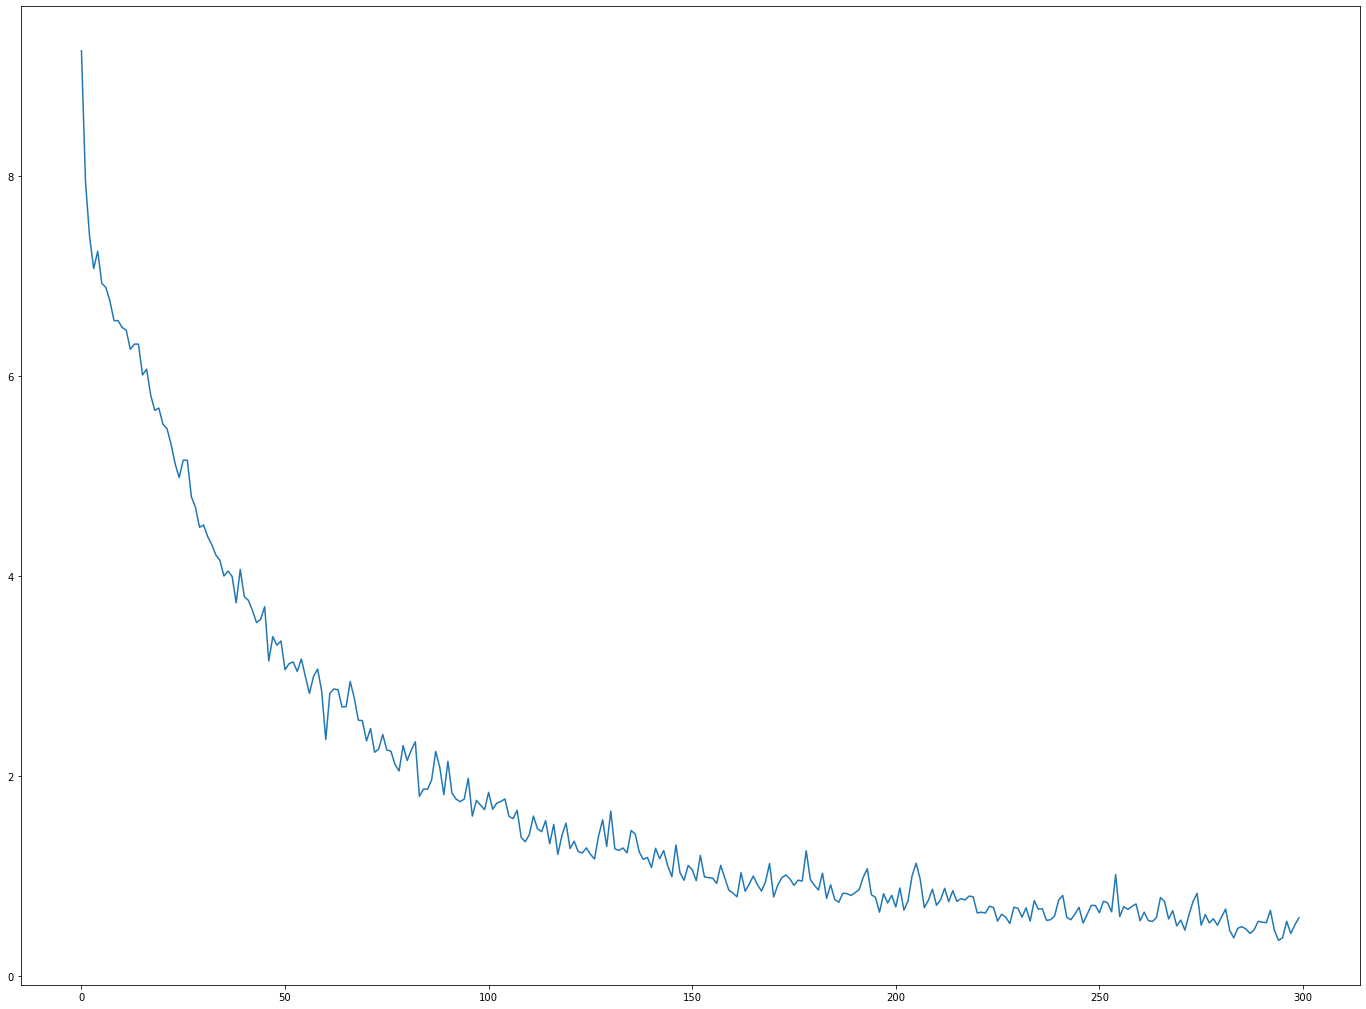

In [11]:
plt.figure(figsize=[24,18])
draw_figure(plt,[loss_list])